# Imports / Setup

In [1]:
import pandas as pd 
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "png"
config = dict({'scrollZoom': True})

# Processing Data

In [2]:
world_data = pd.read_csv('../Data/our-world-can.csv')
world_data = world_data.rename(columns={'Entity': 'Country', 'total_tests': 'Tests', '142601-annotations': 'Tested T/F', 
'Total confirmed deaths due to COVID-19': 'Deaths', 'Total confirmed cases of COVID-19': 'Cases', 'Day': 'Date'})
world_data = world_data.drop(columns=['Code', 'Tested T/F'])
world_data = world_data.fillna(0)

In [3]:
world_data

,Country,Date,Tests,Deaths,Cases
0,2020 Summer Olympics athletes & staff,2021-06-19,0.0,0.0,1.0
1,2020 Summer Olympics athletes & staff,2021-06-20,0.0,0.0,1.0
2,2020 Summer Olympics athletes & staff,2021-06-21,0.0,0.0,1.0
3,2020 Summer Olympics athletes & staff,2021-06-22,0.0,0.0,1.0
4,2020 Summer Olympics athletes & staff,2021-06-23,0.0,0.0,1.0
...,...,...,...,...,...
105718,Zimbabwe,2021-07-19,0.0,2697.0,85732.0
105719,Zimbabwe,2021-07-20,0.0,2747.0,88415.0
105720,Zimbabwe,2020-03-20,0.0,0.0,1.0
105721,Zimbabwe,2020-03-21,0.0,0.0,3.0


In [4]:
can = world_data[world_data['Country'] == 'Canada']
usa = world_data[world_data['Country'] == 'United States']

usa = usa.drop([98765,98764,98763,98762])

In [5]:
can_pivot = can.pivot_table(index = 'Date', values = ['Cases', 'Deaths', 'Tests', 'Country'], aggfunc='sum').reset_index()
usa_pivot = usa.pivot_table(index = 'Date', values = ['Cases', 'Deaths', 'Tests', 'Country'], aggfunc='sum').reset_index()

In [6]:
can_pivot = can_pivot.drop(columns='Date')
can_pivot.insert(0, 'Date', usa_pivot['Date'], True)

usa_pivot.insert(4, 'Cases/Population', (usa_pivot['Cases']/328200000)*100, True)
can_pivot.insert(4, 'Cases/Population', (can_pivot['Cases']/37590000)*100, True)

usa_pivot.insert(5, 'Deaths/Cases', (usa_pivot['Deaths']/usa_pivot['Cases'])*100, True)
can_pivot.insert(5, 'Deaths/Cases', (can_pivot['Deaths']/can_pivot['Cases'])*100, True)

usa_pivot.insert(6, 'Tests/Cases', (usa_pivot['Tests']/usa_pivot['Cases']), True)
can_pivot.insert(6, 'Tests/Cases', (can_pivot['Tests']/can_pivot['Cases']), True)

In [7]:
usa_pivot.insert(5, 'Diff Cases/Population', usa_pivot['Cases/Population'].diff()*100, True)
can_pivot.insert(5, 'Diff Cases/Population', can_pivot['Cases/Population'].diff()*100, True)

In [8]:
can_pivot

,Date,Cases,Deaths,Tests,Cases/Population,Diff Cases/Population,Deaths/Cases,Tests/Cases
0,2020-01-22,1.0,0.0,0.0,0.000003,NaN,0.000000,0.000000
1,2020-01-23,1.0,0.0,0.0,0.000003,0.000000,0.000000,0.000000
2,2020-01-24,2.0,0.0,0.0,0.000005,0.000266,0.000000,0.000000
3,2020-01-25,2.0,0.0,0.0,0.000005,0.000000,0.000000,0.000000
4,2020-01-26,2.0,0.0,0.0,0.000005,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
537,2021-07-16,1430127.0,26450.0,37747547.0,3.804541,0.101091,1.849486,26.394542
538,2021-07-17,1430437.0,26452.0,37794221.0,3.805366,0.082469,1.849225,26.421451
539,2021-07-18,1430740.0,26457.0,37798244.0,3.806172,0.080607,1.849183,26.418667
540,2021-07-19,1431378.0,26466.0,37907486.0,3.807869,0.169726,1.848987,26.483211


In [9]:
usa_pivot

,Date,Cases,Deaths,Tests,Cases/Population,Diff Cases/Population,Deaths/Cases,Tests/Cases
0,2020-01-22,1.0,0.0,0.0,3.046923e-07,NaN,0.000000,0.000000
1,2020-01-23,1.0,0.0,0.0,3.046923e-07,0.000000,0.000000,0.000000
2,2020-01-24,2.0,0.0,0.0,6.093845e-07,0.000030,0.000000,0.000000
3,2020-01-25,2.0,0.0,0.0,6.093845e-07,0.000000,0.000000,0.000000
4,2020-01-26,5.0,0.0,0.0,1.523461e-06,0.000091,0.000000,0.000000
...,...,...,...,...,...,...,...,...
537,2021-07-16,34054952.0,608815.0,478457652.0,1.037628e+01,2.416514,1.787743,14.049576
538,2021-07-17,34067912.0,608884.0,0.0,1.038023e+01,0.394881,1.787265,0.000000
539,2021-07-18,34079960.0,609019.0,0.0,1.038390e+01,0.367093,1.787030,0.000000
540,2021-07-19,34132071.0,609231.0,0.0,1.039978e+01,1.587782,1.784922,0.000000


In [10]:
can_pivot.to_csv('can.csv', index=False)

In [11]:
can_pivot.insert(0, 'Country', ['Canada']*542, True)
usa_pivot.insert(0, 'Country', ['United States']*542, True)
combined = pd.concat([usa_pivot, can_pivot])

In [12]:
combined

,Country,Date,Cases,Deaths,Tests,Cases/Population,Diff Cases/Population,Deaths/Cases,Tests/Cases
0,United States,2020-01-22,1.0,0.0,0.0,3.046923e-07,NaN,0.000000,0.000000
1,United States,2020-01-23,1.0,0.0,0.0,3.046923e-07,0.000000,0.000000,0.000000
2,United States,2020-01-24,2.0,0.0,0.0,6.093845e-07,0.000030,0.000000,0.000000
3,United States,2020-01-25,2.0,0.0,0.0,6.093845e-07,0.000000,0.000000,0.000000
4,United States,2020-01-26,5.0,0.0,0.0,1.523461e-06,0.000091,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
537,Canada,2021-07-16,1430127.0,26450.0,37747547.0,3.804541e+00,0.101091,1.849486,26.394542
538,Canada,2021-07-17,1430437.0,26452.0,37794221.0,3.805366e+00,0.082469,1.849225,26.421451
539,Canada,2021-07-18,1430740.0,26457.0,37798244.0,3.806172e+00,0.080607,1.849183,26.418667
540,Canada,2021-07-19,1431378.0,26466.0,37907486.0,3.807869e+00,0.169726,1.848987,26.483211


In [13]:
combined.to_csv('out-data.csv', index=False)

# Visualizing Data

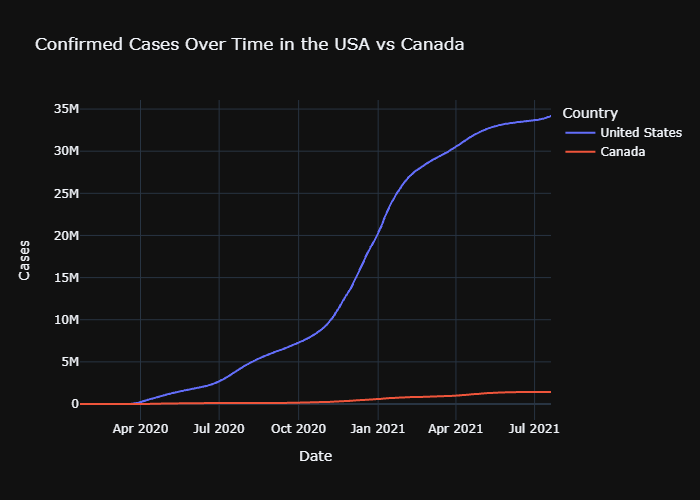

In [14]:
fig = px.line(combined, x='Date', y='Cases', color='Country', template = "plotly_dark", title = "Confirmed Cases Over Time in the USA vs Canada")

fig.show(config=config)

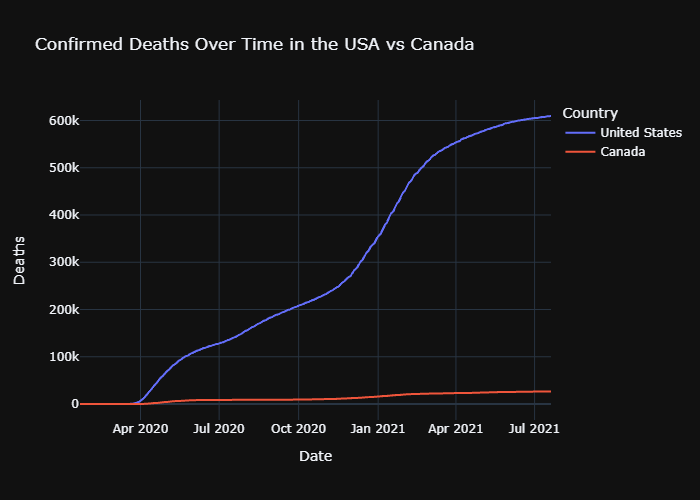

In [15]:
fig = px.line(combined, x='Date', y='Deaths', color='Country', template = "plotly_dark", title = "Confirmed Deaths Over Time in the USA vs Canada")

fig.show(config=config)

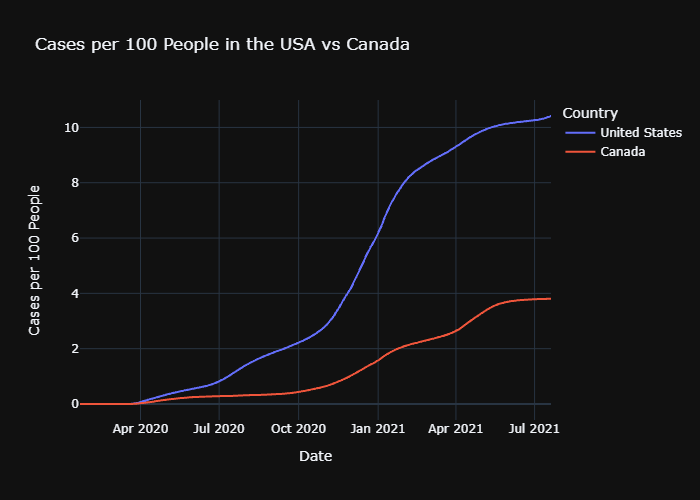

In [16]:
fig = px.line(combined, x='Date', y='Cases/Population', color='Country', template = "plotly_dark", title = "Cases per 100 People in the USA vs Canada", labels={'Cases/Population': 'Cases per 100 People'})

fig.show(config=config)


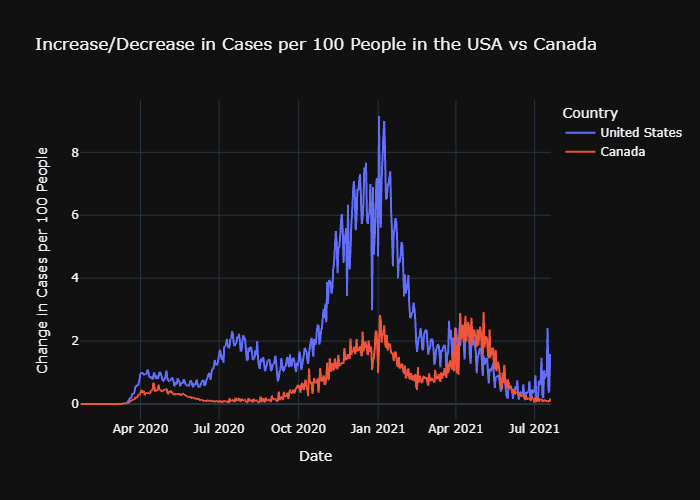

In [17]:
fig = px.line(combined, x='Date', y='Diff Cases/Population', color='Country', template = "plotly_dark", title = "Increase/Decrease in Cases per 100 People in the USA vs Canada", labels={'Diff Cases/Population': 'Change in Cases per 100 People'})

fig.show(config=config)


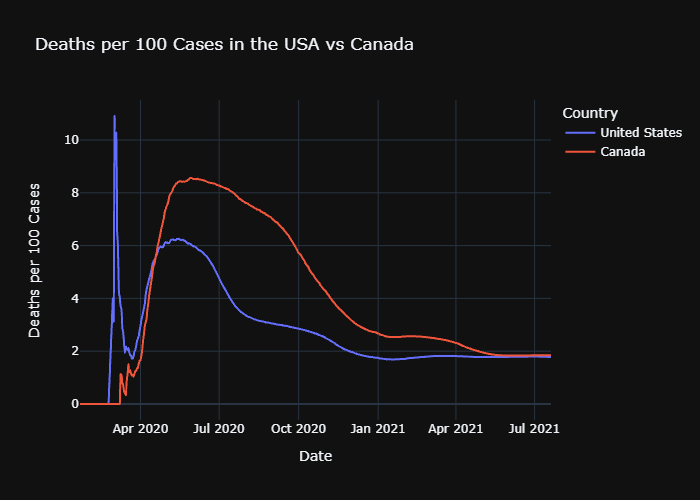

In [18]:
fig = px.line(combined, x='Date', y='Deaths/Cases', color='Country', template = "plotly_dark", title = "Deaths per 100 Cases in the USA vs Canada", labels={'Deaths/Cases': 'Deaths per 100 Cases'})

fig.show(config=config)


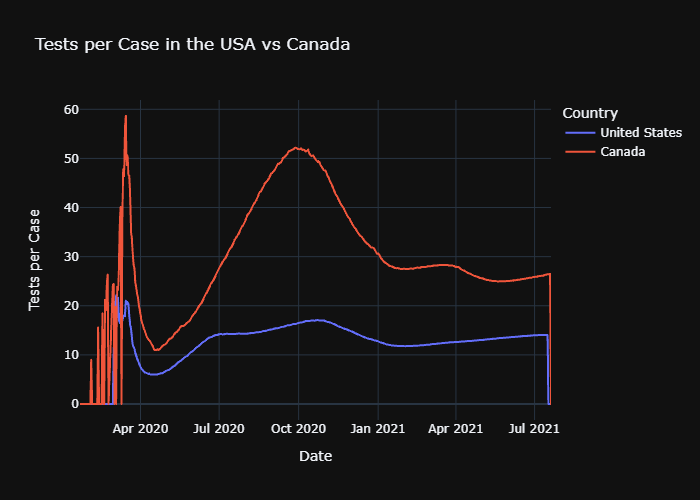

In [19]:
fig = px.line(combined, x='Date', y='Tests/Cases', color='Country', template = "plotly_dark", title = "Tests per Case in the USA vs Canada", labels={'Tests/Cases': 'Tests per Case'})

fig.show(config=config)

In [20]:
can_spend = 100.7+21.1+20.2+3.1+2.9+1.9
usa_spend = 3000

can_gdp = 1700
usa_gdp = 21430

In [21]:
print(f'Canada COVID-19 Spending/GDP:', can_spend/can_gdp)
print(f'USA COVID-19 Spending/GDP:', usa_spend/usa_gdp)

Canada COVID-19 Spending/GDP: 0.0881764705882353
USA COVID-19 Spending/GDP: 0.1399906672888474


In [22]:
vaccine = pd.read_csv('../Data/vaccine.csv')
vaccine

,Country,% of Population Fully Vaccinated
0,United States,50.2
1,Canada,59.6


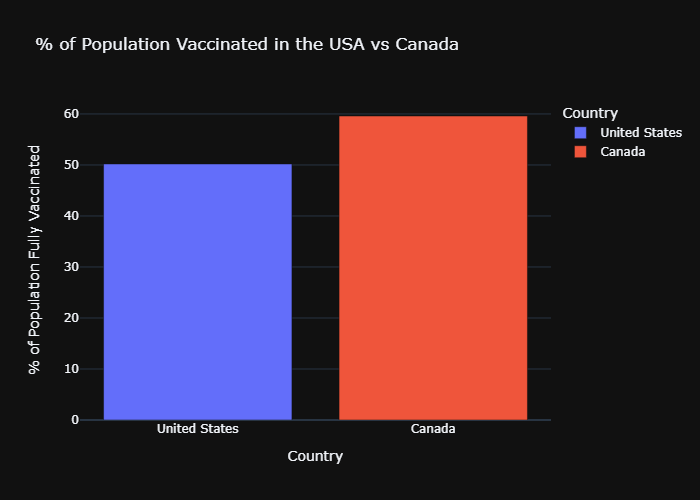

In [23]:
fig = px.bar(vaccine, x='Country', y="% of Population Fully Vaccinated", color='Country', template = "plotly_dark", title = "% of Population Vaccinated in the USA vs Canada")

fig.show(config=config)